In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2tuYWFwdGltZS9Ecm9wYm94L3dvcmtzaG9wcy93b3Jrc2hvcC1uZXJzYTI1L25vdGVib29rcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/importlib/_bootstrap.py": 1749048095.180818, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/importlib/_bootstrap_external.py": 1749048095.186942, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/zipimport.py": 1749048093.681998, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/codecs.py": 1749048093.1941013, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/encodings/aliases.py": 1749048094.2440884, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/encodings/__init__.py": 1749048094.2403631, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/encodings/utf_8.py": 1749048094.6482184, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/abc.py": 1749048093.1029341, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/io.py": 1749048093.3712983, "/Users/knaaptime/miniforge3/envs/nersa25/lib/python3.12/stat.py": 1749048093.571816, "/Users/knaaptime/miniforge3/envs/nersa25/lib/pyth

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
from geosnap import DataStore
from geosnap import io as gio
from libpysal.graph import Graph
import scipy
from formulaic import Formula
from spreg import GMM_Error, GM_Lag

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
datasets = DataStore()

dc = gio.get_acs(datasets, state_fips="11", years=2021, level="tract")

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/util.py:273: UserWarning: Unable to find local adjustment year for 2021. Attempting from online data
  warn(
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:218: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


In [4]:
dc.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
0,11001000101,102.0,0.0,0.0,0.0,68.0,26.0,59.0,0.0,149.0,...,2.341920,0.000000,0.000000,2.341920,0.000000,2.341920,0.0,0.0,"MULTIPOLYGON (((-77.05714 38.91054, -77.05702 ...",2021
1,11001000102,134.0,0.0,0.0,68.0,56.0,14.0,146.0,0.0,746.0,...,6.724512,1.487450,1.456461,4.834211,0.000000,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.06927 38.90058, -77.06871 ...",2021
2,11001000201,152.0,0.0,109.0,5.0,45.0,8.0,98.0,0.0,731.0,...,19.402985,0.000000,0.000000,16.417910,2.985075,0.000000,0.0,0.0,"MULTIPOLYGON (((-77.07927 38.91268, -77.07902 ...",2021
3,11001000202,42.0,46.0,58.0,61.0,91.0,56.0,220.0,0.0,793.0,...,12.948793,2.472042,0.000000,10.829900,0.588582,0.824014,0.0,0.0,"MULTIPOLYGON (((-77.07991 38.90507, -77.07989 ...",2021
4,11001000300,150.0,103.0,8.0,33.0,220.0,74.0,71.0,0.0,1308.0,...,13.308750,0.301710,0.201140,12.504190,0.000000,0.620181,0.0,0.0,"MULTIPOLYGON (((-77.08262 38.9212, -77.08256 3...",2021


<Axes: >

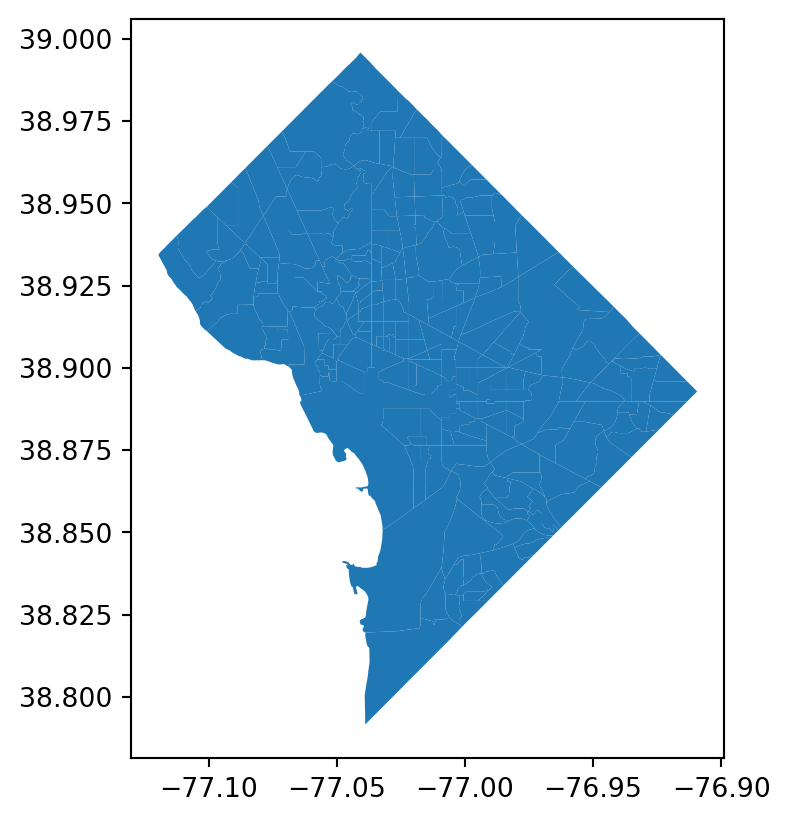

In [5]:
dc.plot()

In [6]:
dc_flows = pd.read_csv(
    "https://lehd.ces.census.gov/data/lodes/LODES8/dc/od/dc_od_main_JT00_2022.csv.gz",
    converters={"w_geocode": str, "h_geocode": str},
    low_memory=False,
    encoding="latin1",
)

In [7]:
dc_flows

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,110010001011000,110010001011000,1,1,0,0,0,0,1,0,1,0,20240920
1,110010001011000,110010001011001,3,1,2,0,0,0,3,0,0,3,20240920
2,110010001011000,110010001011003,1,0,0,1,0,0,1,0,0,1,20240920
3,110010001011000,110010001011009,1,1,0,0,0,0,1,0,1,0,20240920
4,110010001011000,110010001021011,1,0,0,1,0,0,1,0,1,0,20240920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169140,110019800001187,110010094004008,1,0,1,0,0,0,1,0,0,1,20240920
169141,110019800001187,110010095071000,1,0,1,0,0,0,1,0,0,1,20240920
169142,110019800001187,110010099021011,1,0,1,0,0,0,1,0,0,1,20240920
169143,110019800001192,110010047041001,1,0,1,0,1,0,0,0,0,1,20240920


In [8]:
dc_flows["w_tr_geocode"] = dc_flows["w_geocode"].str[:11]
dc_flows["h_tr_geocode"] = dc_flows["h_geocode"].str[:11]

dc_flows = dc_flows[["w_geocode", "h_geocode", "w_tr_geocode", "h_tr_geocode", "S000"]]

In [9]:
dc_flows = (
    dc_flows.groupby(["w_tr_geocode", "h_tr_geocode"])["S000"].sum().reset_index()
)

In [10]:
dc_flows

,w_tr_geocode,h_tr_geocode,S000
0,11001000101,11001000101,22
1,11001000101,11001000102,8
2,11001000101,11001000202,6
3,11001000101,11001000300,3
4,11001000101,11001000501,1
...,...,...,...
23301,11001980000,11001010900,26
23302,11001980000,11001011001,91
23303,11001980000,11001011002,50
23304,11001980000,11001011100,90


In [11]:
dc_flow_graph = Graph.from_adjacency(
    adjacency=dc_flows,
    focal_col="h_tr_geocode",
    neighbor_col="w_tr_geocode",
    weight_col="S000",
)

In [12]:
dc_flow_graph.summary(asymmetries=True)

Graph Summary Statistics
========================
Graph indexed by:
 ['11001000101', '11001000102', '11001000202', '1100100030...]
==============================================================
Number of nodes:                                           206
Number of edges:                                         23306
Number of connected components:                              1
Number of isolates:                                          0
Number of non-zero edges:                                23306
Percentage of non-zero edges:                           54.92%
Number of asymmetries:                                   32336
--------------------------------------------------------------
Cardinalities
==============================================================
Mean:                     113    25%:                      102
Standard deviation:        24    50%:                      115
Min:                       23    75%:                      131
Max:                      159
--------------------------------------------------------------
Weights
==============================================================
Mean:                       9    25%:                        1
Standard deviation:        20    50%:                        3
Min:                        1    75%:                        7
Max:                      361
--------------------------------------------------------------
Sum of weights
==============================================================
S0:                                                     206135
S1:                                                   12398975
S2:                                                 2363152954
--------------------------------------------------------------
Traces
==============================================================
GG:                                                     915878
G'G:                                                  11483097
G'G + GG:                                             12398975

In [13]:
23306 / 206**2

0.549203506456782

In [14]:
dc_flow_graph.adjacency.head()

focal        neighbor   
11001000101  11001000101    22
             11001000102    23
             11001000202    12
             11001000703     1
             11001000704     1
Name: weight, dtype: int64

In [15]:
idx = dc_flow_graph.unique_ids

In [16]:
dc_centroids = dc.set_geometry(dc.centroid)
dc_centroids = dc_centroids.set_index("geoid").reindex(idx)

/var/folders/j8/5bgcw6hs7cqcbbz48d6bsftw0000gp/T/ipykernel_33030/898227089.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dc_centroids = dc.set_geometry(dc.centroid)


In [17]:
dc_centroids.shape  # matches our Graph.n

(206, 157)

In [18]:
dc = dc.set_index("geoid")

In [19]:
# for our dataset we want the full dense matrix
dc_interaction = pd.Series(dc_flow_graph.sparse.toarray().reshape(-1), 
                             index=pd.MultiIndex.from_product([dc_flow_graph.unique_ids, 
                                                               dc_flow_graph.unique_ids.rename('neighbor')])).rename('weight')

In [20]:
dc_interaction = dc_interaction.reset_index()
dc_interaction

,focal,neighbor,weight
0,11001000101,11001000101,22.0
1,11001000101,11001000102,23.0
2,11001000101,11001000202,12.0
3,11001000101,11001000300,0.0
4,11001000101,11001000501,0.0
...,...,...,...
42431,11001980000,11001011002,0.0
42432,11001980000,11001011100,0.0
42433,11001980000,11001000201,0.0
42434,11001980000,11001006804,0.0


In [21]:
dc.shape[0] ** 2

42436

In [22]:
# first merge origin attributes
dc_interaction = dc_interaction.merge(
    dc.drop(columns=["geometry"]), left_on="focal", right_index=True, how="left"
)

In [23]:
# now merge destination attributes
dc_interaction = dc_interaction.merge(
    dc.drop(columns=["geometry"]),
    left_on="neighbor",
    right_index=True,
    how="left",
    suffixes=["_origin", "_destination"],
)

In [24]:
dc_interaction

,focal,neighbor,weight,n_mexican_pop_origin,n_cuban_pop_origin,n_puerto_rican_pop_origin,n_russian_pop_origin,n_italian_pop_origin,n_german_pop_origin,n_irish_pop_origin,...,p_veterans_destination,p_poverty_rate_destination,p_poverty_rate_over_65_destination,p_poverty_rate_children_destination,p_poverty_rate_white_destination,p_poverty_rate_black_destination,p_poverty_rate_hispanic_destination,p_poverty_rate_native_destination,p_poverty_rate_asian_destination,year_destination
0,11001000101,11001000101,22.0,102.0,0.0,0.0,0.0,68.0,26.0,59.0,...,6.245121,2.341920,0.000000,0.000000,2.341920,0.000000,2.341920,0.000000,0.0,2021
1,11001000101,11001000102,23.0,102.0,0.0,0.0,0.0,68.0,26.0,59.0,...,6.073753,6.724512,1.487450,1.456461,4.834211,0.000000,0.000000,0.000000,0.0,2021
2,11001000101,11001000202,12.0,102.0,0.0,0.0,0.0,68.0,26.0,59.0,...,3.525424,12.948793,2.472042,0.000000,10.829900,0.588582,0.824014,0.000000,0.0,2021
3,11001000101,11001000300,0.0,102.0,0.0,0.0,0.0,68.0,26.0,59.0,...,0.838082,13.308750,0.301710,0.201140,12.504190,0.000000,0.620181,0.000000,0.0,2021
4,11001000101,11001000501,0.0,102.0,0.0,0.0,0.0,68.0,26.0,59.0,...,0.993571,8.556307,1.705381,0.000000,2.087621,6.380476,0.529256,0.000000,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42431,11001980000,11001011002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.414088,6.126617,3.335602,0.000000,6.126617,0.000000,0.000000,0.000000,0.0,2021
42432,11001980000,11001011100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.466872,17.596308,1.645265,0.000000,0.521669,17.074639,0.100321,0.000000,0.0,2021
42433,11001980000,11001000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177755,19.402985,0.000000,0.000000,16.417910,2.985075,0.000000,0.000000,0.0,2021
42434,11001980000,11001006804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.166193,55.902778,31.597222,0.000000,11.805556,39.236111,2.083333,4.861111,0.0,2021


In [25]:
dc_interaction[
    ["weight", "median_household_income_origin", "median_household_income_destination"]
]

,weight,median_household_income_origin,median_household_income_destination
0,22.0,157276.0,157276.0
1,23.0,157276.0,166816.0
2,12.0,157276.0,161490.0
3,0.0,157276.0,159714.0
4,0.0,157276.0,109363.0
...,...,...,...
42431,0.0,NaN,110594.0
42432,0.0,NaN,74213.0
42433,0.0,NaN,NaN
42434,0.0,NaN,250001.0


In [26]:
dc = dc.to_crs(dc.estimate_utm_crs())

In [27]:
dc = dc[dc.index.isin(dc_flow_graph.unique_ids)]

dc_dist = Graph.build_distance_band(
    dc.set_geometry(dc.centroid), threshold=1e20, binary=False, alpha=1
)

In [28]:
dc_dist.summary()

Graph Summary Statistics
========================
Graph indexed by:
 ['11001000101', '11001000102', '11001000201', '1100100020...]
==============================================================
Number of nodes:                                           206
Number of edges:                                         42230
Number of connected components:                              1
Number of isolates:                                          0
Number of non-zero edges:                                42230
Percentage of non-zero edges:                           99.51%
Number of asymmetries:                            NA
--------------------------------------------------------------
Cardinalities
==============================================================
Mean:                     205    25%:                      205
Standard deviation:         0    50%:                      205
Min:                      205    75%:                      205
Max:                      205
--------------------------------------------------------------
Weights
==============================================================
Mean:                    6269    25%:                     3627
Standard deviation:      3403    50%:                     5817
Min:                      207    75%:                     8529
Max:                    19236
--------------------------------------------------------------
Sum of weights
==============================================================
S0:                                                  264750122
S1:                                               4297473688556
S2:                                               1435759541759836
--------------------------------------------------------------
Traces
==============================================================
GG:                                               2148736844278
G'G:                                              2148736844278
G'G + GG:                                         4297473688556

In [29]:
dc_dist.adjacency

focal        neighbor   
11001000101  11001000102     673.024487
             11001000201    1714.423693
             11001000202    1318.286816
             11001000300    2086.439842
             11001000400    1954.193812
                               ...     
11001980000  11001010800    2075.840579
             11001010900    7660.568101
             11001011001    1816.050530
             11001011002    1999.546509
             11001011100    7177.371175
Name: weight, Length: 42230, dtype: float64

In [30]:
# subset the distance graph by the travel graph (remove destinations we dont need)
# but this resets weights to 1
dc_dist_adj = dc_dist.intersection(dc_flow_graph).adjacency

In [31]:
# update with the old values
dc_dist_adj.update(dc_dist.adjacency)

/var/folders/j8/5bgcw6hs7cqcbbz48d6bsftw0000gp/T/ipykernel_33030/3611604903.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 673.02448689 1714.42369324 1318.28681649 ... 7734.28131571 2519.49437645
  989.25225739]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  dc_dist_adj.update(dc_dist.adjacency)


In [32]:
dc_interaction["distance"] = dc_dist.sparse.toarray().reshape(-1)

In [33]:
dc_interaction['weight'] = dc_interaction['weight'].astype(int)

In [34]:
contg = Graph.build_contiguity(dc)

In [35]:
contg

<Graph of 206 nodes and 1060 nonzero edges indexed by
 ['11001000101', '11001000102', '11001000201', '11001000202', '1100100030...]>

In [36]:
contg.explore(dc.centroid)

In [37]:
kg = Graph.from_sparse(scipy.sparse.kron(dc_flow_graph.transform("b").sparse, contg.sparse))

In [38]:
kg.n

42436

In [39]:
dc_interaction.shape[0]

42436

In [40]:
kg.pct_nonzero

1.3718439929404018

In [41]:
contg.pct_nonzero

2.497879159204449

In [42]:
dc_flow_graph.pct_nonzero

54.9203506456782

In [43]:
kg = kg.transform('r')

<Axes: >

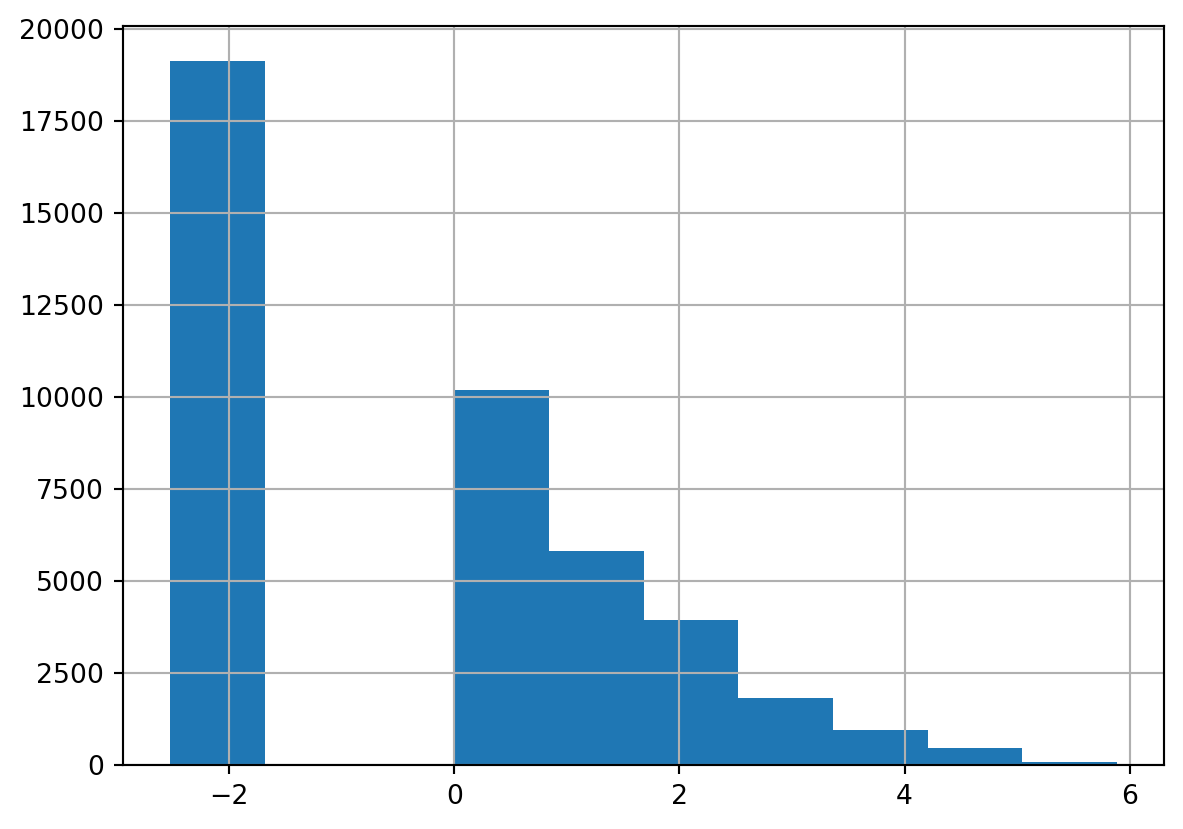

In [44]:
dc_interaction.weight.replace(0,0.08).apply(np.log).hist()

<Axes: >

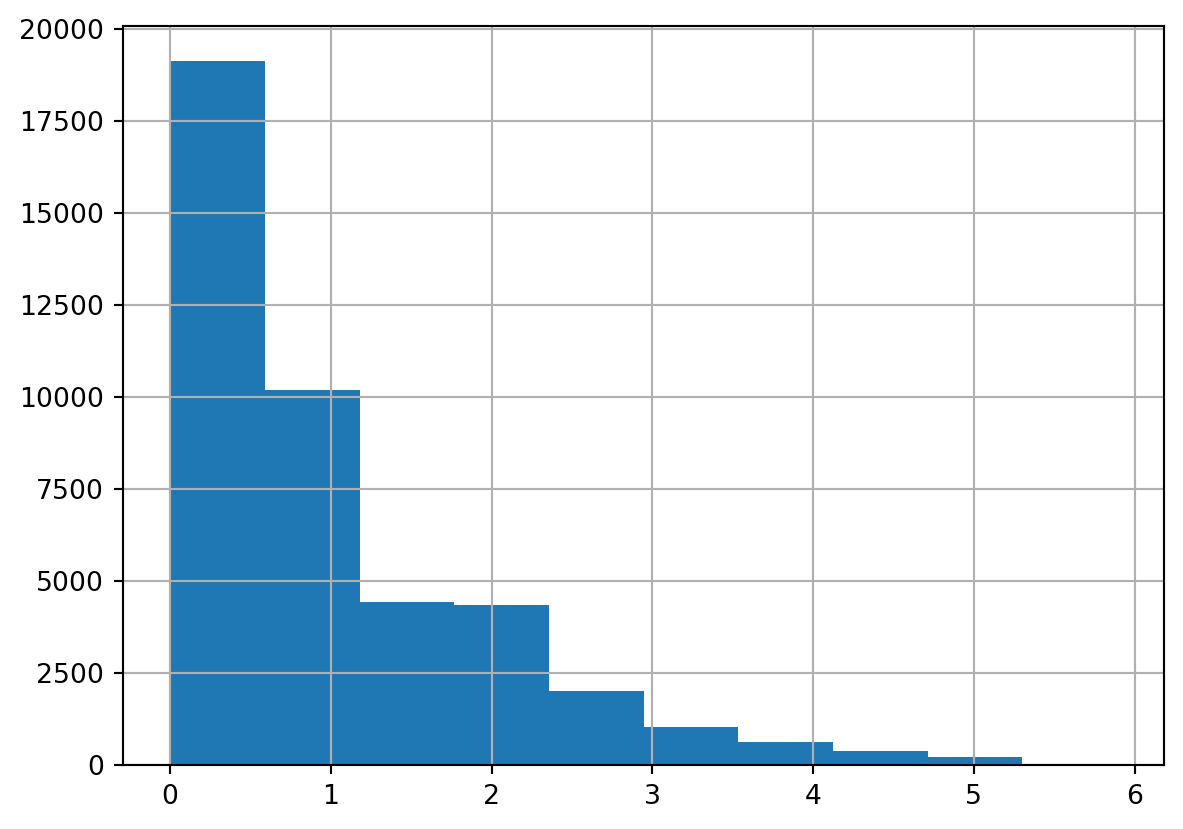

In [45]:
dc_interaction.weight.apply(np.log1p).hist()

In [46]:
form = "np.log1p(weight) ~ 1+ np.log1p(n_total_pop_origin) + np.log1p(median_household_income_origin) + np.log1p(p_nonhisp_black_persons_origin) + np.log1p(n_total_pop_destination) + np.log1p(median_household_income_destination) + np.log1p(p_nonhisp_black_persons_destination) + np.log1p(distance)"

In [47]:
f = Formula(form)

# mean-impute missing values and replace any zeros with 0.08 for convenience
y, x = f.get_model_matrix(
    dc_interaction.fillna(dc_interaction.mean(numeric_only=True))#.replace(0, 0.08)
)

In [48]:
y

,np.log1p(weight)
0,3.135494
1,3.178054
2,2.564949
3,0.000000
4,0.000000
...,...
42431,0.000000
42432,0.000000
42433,0.000000
42434,0.000000


In [49]:
flow_lag = GM_Lag(y=y, x=x, w=kg, robust='white')

In [50]:
print(flow_lag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           9
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42427
Pseudo R-squared    :      0.2190
Spatial Pseudo R-squared:  0.1924

White Standard Errors
------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         1.13811         0.20426         5.57173         0.00000
np.log1p(n_total_pop_origin)         0.21307         0.00895        23.79478         0.00000
np.log1p

In [51]:
flow_lag.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,1.138105,0.204264,5.571726,0.0
1,np.log1p(n_total_pop_origin),0.213068,0.008954,23.794778,0.0
2,np.log1p(median_household_income_origin),0.011936,0.009723,1.227619,0.21959
3,np.log1p(p_nonhisp_black_persons_origin),0.071212,0.005029,14.159196,0.0
4,np.log1p(n_total_pop_destination),-0.2052,0.012716,-16.136889,0.0
5,np.log1p(median_household_income_destination),0.086296,0.010475,8.23858,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.200238,0.007,-28.606256,0.0
7,np.log1p(distance),-0.167348,0.006042,-27.695788,0.0
8,W_np.log1p(weight),0.468951,0.013756,34.089521,0.0


<Axes: >

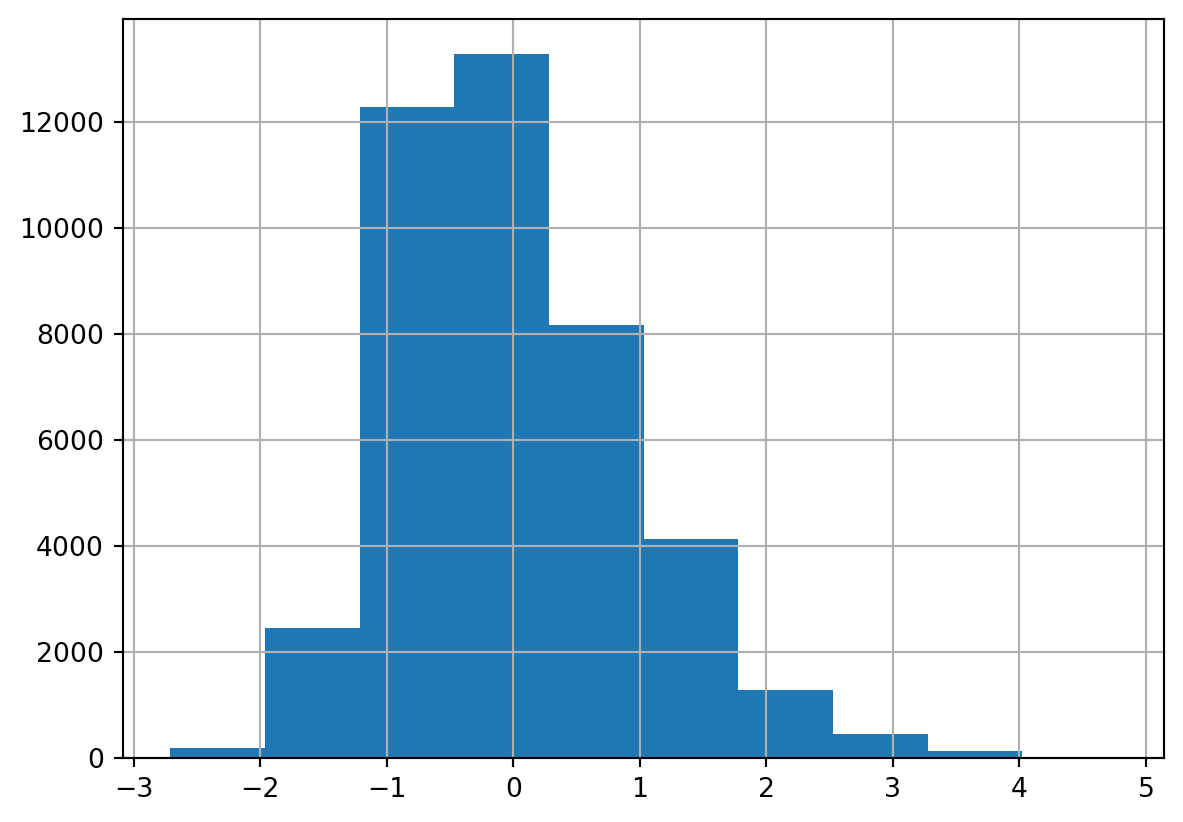

In [52]:
pd.Series(flow_lag.u.flatten()).hist()

In [53]:
kgd = Graph.from_sparse(scipy.sparse.kron(dc_flow_graph.transform("b").sparse.transpose(), contg.sparse))

In [54]:
kgd = kgd.transform('r')

In [55]:
kgd.pct_nonzero

1.3718439929404018

In [56]:
dest_flow_lag = GM_Lag(y=y, x=x,  w=kgd)

In [57]:
print(dest_flow_lag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           9
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42427
Pseudo R-squared    :      0.2144
Spatial Pseudo R-squared:  0.1896

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.92005         0.19826         4.64061         0.00000
np.log1p(n_total_pop_origin)         0.21931         0.00992        22.09697         0.00000
np.log1p(median_household_inco

In [58]:
dest_flow_lag.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,0.920051,0.198261,4.640612,0.000003
1,np.log1p(n_total_pop_origin),0.21931,0.009925,22.096967,0.0
2,np.log1p(median_household_income_origin),0.011387,0.009972,1.141963,0.25347
3,np.log1p(p_nonhisp_black_persons_origin),0.070364,0.005329,13.204186,0.0
4,np.log1p(n_total_pop_destination),-0.203745,0.00997,-20.436753,0.0
5,np.log1p(median_household_income_destination),0.094141,0.010002,9.412175,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.20389,0.005702,-35.758313,0.0
7,np.log1p(distance),-0.163249,0.005205,-31.365431,0.0
8,W_np.log1p(weight),0.483894,0.013632,35.496968,0.0


In [59]:
kg_od = kg.transform('b').union(kgd.transform('b'))

In [60]:
kg_od = kg_od.transform('r')

In [61]:
kg_od.pct_nonzero

2.0139724628188382

In [62]:
od_flow_lag = GM_Lag(y=y, x=x, w=kg_od)

In [63]:
print(od_flow_lag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           9
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42427
Pseudo R-squared    :      0.2154
Spatial Pseudo R-squared:  0.1904

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         1.04565         0.19744         5.29602         0.00000
np.log1p(n_total_pop_origin)         0.21780         0.00992        21.96064         0.00000
np.log1p(median_household_inco

In [64]:
od_flow_lag.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,1.045648,0.19744,5.296021,0.0
1,np.log1p(n_total_pop_origin),0.217802,0.009918,21.960641,0.0
2,np.log1p(median_household_income_origin),0.010408,0.009965,1.044499,0.296255
3,np.log1p(p_nonhisp_black_persons_origin),0.07703,0.005321,14.476035,0.0
4,np.log1p(n_total_pop_destination),-0.20499,0.009959,-20.582747,0.0
5,np.log1p(median_household_income_destination),0.08989,0.009986,9.001304,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.203087,0.005707,-35.584263,0.0
7,np.log1p(distance),-0.167245,0.005192,-32.213151,0.0
8,W_np.log1p(weight),0.474372,0.013376,35.463697,0.0


In [65]:
kg_od = Graph.from_sparse(kg.transform('b').sparse + kgd.transform('b').sparse)
kg_od = kg_od.transform('r')

In [66]:
print(od_flow_lag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           9
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42427
Pseudo R-squared    :      0.2154
Spatial Pseudo R-squared:  0.1904

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         1.04565         0.19744         5.29602         0.00000
np.log1p(n_total_pop_origin)         0.21780         0.00992        21.96064         0.00000
np.log1p(median_household_inco

In [67]:
od_flow_lag.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,1.045648,0.19744,5.296021,0.0
1,np.log1p(n_total_pop_origin),0.217802,0.009918,21.960641,0.0
2,np.log1p(median_household_income_origin),0.010408,0.009965,1.044499,0.296255
3,np.log1p(p_nonhisp_black_persons_origin),0.07703,0.005321,14.476035,0.0
4,np.log1p(n_total_pop_destination),-0.20499,0.009959,-20.582747,0.0
5,np.log1p(median_household_income_destination),0.08989,0.009986,9.001304,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.203087,0.005707,-35.584263,0.0
7,np.log1p(distance),-0.167245,0.005192,-32.213151,0.0
8,W_np.log1p(weight),0.474372,0.013376,35.463697,0.0


In [68]:
flow_error_origin = GMM_Error(y=y, x=x, w=kg)

In [69]:
print(flow_error_origin.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           8
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42428
Pseudo R-squared    :      0.1715
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.56346         0.20423         2.75895         0.00580
np.log1p(n_total_pop_origin)         0.21456        

In [70]:
flow_error_origin.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,0.563463,0.204231,2.758949,0.005799
1,np.log1p(n_total_pop_origin),0.214562,0.008915,24.06762,0.0
2,np.log1p(median_household_income_origin),0.007952,0.009837,0.808354,0.418887
3,np.log1p(p_nonhisp_black_persons_origin),0.073376,0.005192,14.132946,0.0
4,np.log1p(n_total_pop_destination),-0.153111,0.0136,-11.258098,0.0
5,np.log1p(median_household_income_destination),0.14984,0.010782,13.89702,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.225354,0.007238,-31.135217,0.0
7,np.log1p(distance),-0.173299,0.00611,-28.361959,0.0
8,lambda,0.433203,0.001019,425.125382,0.0


In [71]:
flow_error_dest = GMM_Error(y=y, x=x, w=kgd)

In [72]:
print(flow_error_dest.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           8
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42428
Pseudo R-squared    :      0.1715
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.56128         0.20497         2.73832         0.00618
np.log1p(n_total_pop_origin)         0.21696        

In [73]:
flow_error_dest.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,0.561276,0.204971,2.73832,0.006175
1,np.log1p(n_total_pop_origin),0.216964,0.008969,24.191224,0.0
2,np.log1p(median_household_income_origin),0.005457,0.010026,0.544231,0.586282
3,np.log1p(p_nonhisp_black_persons_origin),0.076774,0.005229,14.682813,0.0
4,np.log1p(n_total_pop_destination),-0.156139,0.013183,-11.843813,0.0
5,np.log1p(median_household_income_destination),0.152175,0.010864,14.00732,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.229974,0.007373,-31.191871,0.0
7,np.log1p(distance),-0.174048,0.006155,-28.278234,0.0
8,lambda,0.50877,0.001172,434.088366,0.0


In [74]:
flow_error_od = GMM_Error(y=y, x=x, w=kg_od)

In [75]:
print(flow_error_od.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :np.log1p(weight)                Number of Observations:       42436
Mean dependent var  :      0.8921                Number of Variables   :           8
S.D. dependent var  :      1.0715                Degrees of Freedom    :       42428
Pseudo R-squared    :      0.1715
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.56353         0.20413         2.76064         0.00577
np.log1p(n_total_pop_origin)         0.21591        

In [76]:
flow_error_od.output

,var_names,coefficients,std_err,zt_stat,prob
0,CONSTANT,0.563534,0.204132,2.760642,0.005769
1,np.log1p(n_total_pop_origin),0.215913,0.008909,24.235136,0.0
2,np.log1p(median_household_income_origin),0.006487,0.009855,0.658206,0.510406
3,np.log1p(p_nonhisp_black_persons_origin),0.076789,0.005151,14.907596,0.0
4,np.log1p(n_total_pop_destination),-0.154617,0.013458,-11.488873,0.0
5,np.log1p(median_household_income_destination),0.15089,0.010814,13.953006,0.0
6,np.log1p(p_nonhisp_black_persons_destination),-0.227383,0.007285,-31.210786,0.0
7,np.log1p(distance),-0.174273,0.006113,-28.506414,0.0
8,lambda,0.457305,0.000976,468.340074,0.0
